In [21]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
# Import the NumPy module.
import numpy as np
import pandas as pd


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# zip them into pairs so that one lat goes with each lngs and then they become a tuple
lat_lngs = zip(lats, lngs)
lat_lngs
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    #cordinate [0] is column 1, cordinate [1] is column 2
    print(coordinate[0], coordinate[1])
    
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
    
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

4.400936945730933 -147.02697022267483
-4.745564223861308 -90.44453635436419
-36.10799413166614 59.4580825400196
-3.781342153765763 -139.47819889332354
1.7739745642989675 -158.52053050172702
-73.71507158622435 106.95122154048624
-87.59251202638538 -40.29886327517329
-54.585500573477454 -2.280442526480016
34.849682003493285 110.30806345198368
-5.416632903424741 43.198866842813516
50.35069751657488 81.48514374835156
59.17505841603298 13.775641351023438
-34.34062447971517 -168.949575703974
-78.08545524196433 3.81024324942166
-8.997904125167508 36.9507631343771
-75.69797540825653 -52.704336405417195
58.74258596187664 25.02567066809337
-23.331839469364652 41.98219396169213
70.61671789749829 6.115788115571661
68.97518261853426 162.67097998328046
-44.31770466402843 -107.06651127037804
-85.24986418221492 -65.82834450595608
-46.14194394201823 59.23735622882867
-13.86736418876798 78.91826921255466
84.24201278872181 101.83390327570339
81.08120468296411 33.92974536592297
19.35958478243535 93.554850

atuona pf
san cristobal ec
saint-philippe re
atuona pf
hilo us
albany au
ushuaia ar
cape town za
yuncheng cn
micheweni tz
shemonaikha kz
karlstad se
vaini to
hermanus za
mahenge tz
ushuaia ar
vandra ee
toliary mg
sorland no
cherskiy ru
castro cl
ushuaia ar
taolanaro mg
hithadhoo mv
khatanga ru
vardo no
akyab mm
lolua tv
klaksvik fo
busselton au
smidovich ru
kahului us
hermanus za
jamestown sh
upernavik gl
dingle ie
esmeraldas ec
port elizabeth za
coihaique cl
viligili mv
new norfolk au
bluff nz
alta floresta br
busselton au
busselton au
new norfolk au
rikitea pf
cherskiy ru
punta arenas cl
camacha pt
burgos es
albany au
georgetown sh
punta arenas cl
rikitea pf
te anau nz
luebo cd
odweyne so
kapaa us
umzimvubu za
belmonte br
rikitea pf
pevek ru
touros br
qaanaaq gl
castro cl
manuk mangkaw ph
atuona pf
hithadhoo mv
saint george bm
kieta pg
yellowknife ca
kaitangata nz
aklavik ca
sioux lookout ca
komsomolskiy ru
constitucion mx
busselton au
carnarvon au
darhan mn
northam au
fort nelson ca

hilo us
berezovka ru
bombarral pt
brasileia br
general cepeda mx
bluff nz
hami cn
bambous virieux mu
albany au
castro cl
hilo us
clyde river ca
warri ng
punta arenas cl
joppatowne us
kapaa us
jamestown sh
cape town za
ahipara nz
nikolskoye ru
haines junction ca
nikolskoye ru
yellowknife ca
ushuaia ar
cururupu br
chokurdakh ru
hilo us
rio gallegos ar
maniitsoq gl
husavik is
ushuaia ar
vaini to
khatanga ru
norman wells ca
santander es
kapaa us
pozo colorado py
kapaa us
rikitea pf
adrar dz
busselton au
barrow us
ribeira grande pt
avarua ck
attawapiskat ca
malwan in
port alfred za
livingston us
kasongo-lunda cd
georgetown sh
busselton au
rikitea pf
tete mz
faanui pf
illoqqortoormiut gl
road town vg
san rafael ar
butaritari ki
port hardy ca
rikitea pf
vaini to
aloleng ph
kiruna se
cape town za
ushuaia ar
brigantine us
belushya guba ru
nikolskoye ru
busselton au
saint george bm
punta arenas cl
mar del plata ar
belyy yar ru
ust-karsk ru
koungou yt
bara sd
puerto ayora ec
belushya guba ru
soui

611

In [3]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [4]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | san cristobal
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | yuncheng
Processing Record 9 of Set 1 | micheweni
Processing Record 10 of Set 1 | shemonaikha
Processing Record 11 of Set 1 | karlstad
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | mahenge
Processing Record 15 of Set 1 | vandra
Processing Record 16 of Set 1 | toliary
City not found. Skipping...
Processing Record 17 of Set 1 | sorland
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | khatanga
Processing Record 23 of Set 1 | vardo
Processing Rec

Processing Record 38 of Set 4 | cayenne
Processing Record 39 of Set 4 | severnoye
Processing Record 40 of Set 4 | bichena
Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | saleaula
City not found. Skipping...
Processing Record 43 of Set 4 | tura
Processing Record 44 of Set 4 | atar
Processing Record 45 of Set 4 | rocha
Processing Record 46 of Set 4 | nome
Processing Record 47 of Set 4 | tunduru
City not found. Skipping...
Processing Record 48 of Set 4 | mahebourg
Processing Record 49 of Set 4 | hervey bay
Processing Record 50 of Set 4 | kegayli
City not found. Skipping...
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | pyra
Processing Record 3 of Set 5 | hvolsvollur
Processing Record 4 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | hofn
Processing Record 7 of Set 5 | saint-georges
Processing Record 8 of Set 5 | aljubarrota
Processing Record 9 of Set 5 | ayaviri

Processing Record 25 of Set 8 | bombarral
Processing Record 26 of Set 8 | brasileia
Processing Record 27 of Set 8 | general cepeda
Processing Record 28 of Set 8 | bambous virieux
Processing Record 29 of Set 8 | clyde river
Processing Record 30 of Set 8 | warri
Processing Record 31 of Set 8 | joppatowne
Processing Record 32 of Set 8 | ahipara
Processing Record 33 of Set 8 | cururupu
Processing Record 34 of Set 8 | rio gallegos
Processing Record 35 of Set 8 | husavik
Processing Record 36 of Set 8 | santander
Processing Record 37 of Set 8 | pozo colorado
Processing Record 38 of Set 8 | malwan
City not found. Skipping...
Processing Record 39 of Set 8 | livingston
Processing Record 40 of Set 8 | kasongo-lunda
Processing Record 41 of Set 8 | tete
Processing Record 42 of Set 8 | road town
Processing Record 43 of Set 8 | san rafael
Processing Record 44 of Set 8 | port hardy
Processing Record 45 of Set 8 | aloleng
Processing Record 46 of Set 8 | kiruna
Processing Record 47 of Set 8 | brigantine

City not found. Skipping...
Processing Record 15 of Set 12 | innisfail
Processing Record 16 of Set 12 | kaeo
Processing Record 17 of Set 12 | botou
Processing Record 18 of Set 12 | ivanovka
Processing Record 19 of Set 12 | conceicao do araguaia
Processing Record 20 of Set 12 | tondano
Processing Record 21 of Set 12 | aquiraz
Processing Record 22 of Set 12 | tanggu
Processing Record 23 of Set 12 | concordia
Processing Record 24 of Set 12 | zavodoukovsk
Processing Record 25 of Set 12 | paamiut
Processing Record 26 of Set 12 | praya
Processing Record 27 of Set 12 | susanville
Processing Record 28 of Set 12 | plettenberg bay
Processing Record 29 of Set 12 | chabahar
Processing Record 30 of Set 12 | hambantota
Processing Record 31 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 32 of Set 12 | zalantun
Processing Record 33 of Set 12 | gouloure
Processing Record 34 of Set 12 | catuday
Processing Record 35 of Set 12 | great falls
Processing Record 36 of Set 12 | linxi
Proc

In [9]:
len(city_data)

558

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.66,80,99,22.19,PF,2023-01-22 17:19:43
1,San Cristobal,7.7669,-72.2250,77.18,43,98,8.19,VE,2023-01-22 17:19:44
2,Saint-Philippe,-21.3585,55.7679,74.79,85,100,5.44,RE,2023-01-22 17:19:44
3,Hilo,19.7297,-155.0900,73.27,83,40,8.05,US,2023-01-22 17:19:44
4,Albany,42.6001,-73.9662,34.03,75,99,7.07,US,2023-01-22 17:15:44
5,Ushuaia,-54.8000,-68.3000,56.86,38,0,10.36,AR,2023-01-22 17:17:15
6,Cape Town,-33.9258,18.4232,74.10,60,20,24.16,ZA,2023-01-22 17:17:22
7,Yuncheng,35.0231,110.9928,30.81,53,63,1.95,CN,2023-01-22 17:19:45
8,Micheweni,-4.9667,39.8333,80.62,81,100,15.68,TZ,2023-01-22 17:19:45
9,Shemonaikha,50.6328,81.9056,-10.23,91,86,7.02,KZ,2023-01-22 17:19:46


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2023-01-22 17:19:43,-9.8000,-139.0333,78.66,80,99,22.19
1,San Cristobal,VE,2023-01-22 17:19:44,7.7669,-72.2250,77.18,43,98,8.19
2,Saint-Philippe,RE,2023-01-22 17:19:44,-21.3585,55.7679,74.79,85,100,5.44
3,Hilo,US,2023-01-22 17:19:44,19.7297,-155.0900,73.27,83,40,8.05
4,Albany,US,2023-01-22 17:15:44,42.6001,-73.9662,34.03,75,99,7.07
5,Ushuaia,AR,2023-01-22 17:17:15,-54.8000,-68.3000,56.86,38,0,10.36
6,Cape Town,ZA,2023-01-22 17:17:22,-33.9258,18.4232,74.10,60,20,24.16
7,Yuncheng,CN,2023-01-22 17:19:45,35.0231,110.9928,30.81,53,63,1.95
8,Micheweni,TZ,2023-01-22 17:19:45,-4.9667,39.8333,80.62,81,100,15.68
9,Shemonaikha,KZ,2023-01-22 17:19:46,50.6328,81.9056,-10.23,91,86,7.02


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'01/22/23'

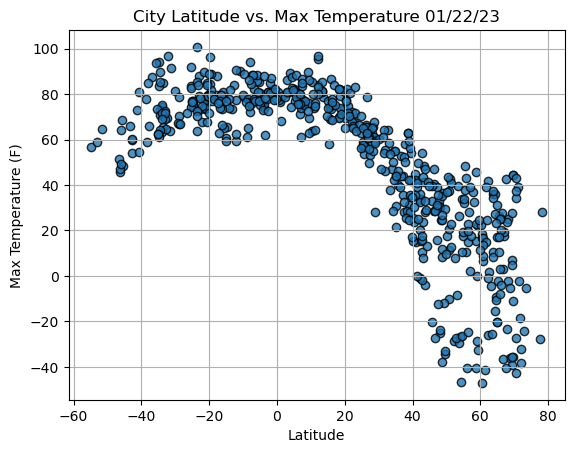

In [24]:
# Import time module
import time

# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

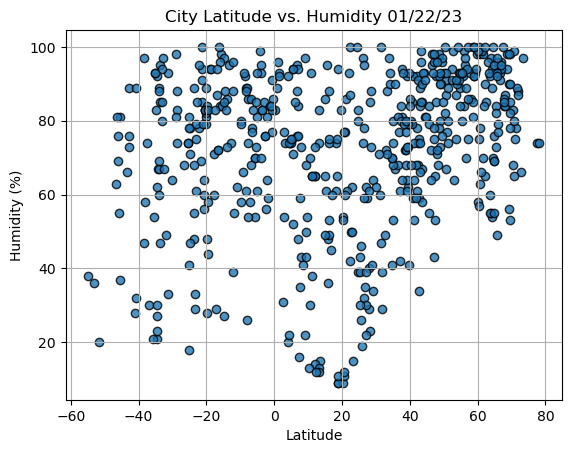

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

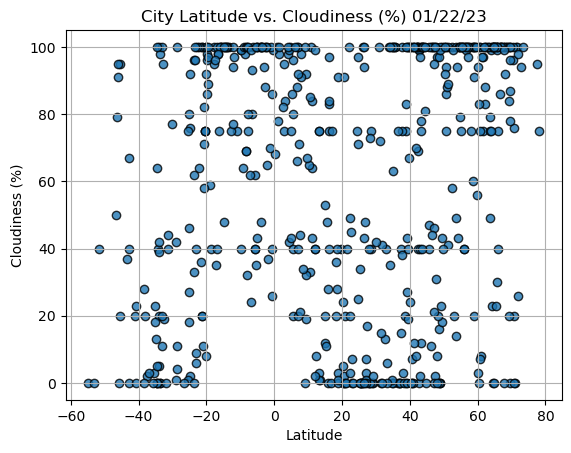

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

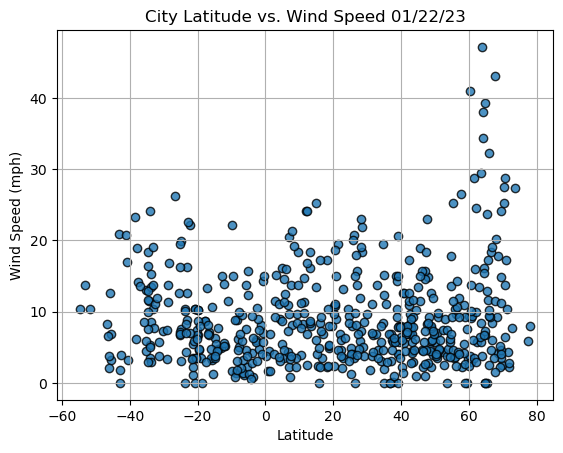

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()